Este notebook es una prueba de funcionamiento, se busca unir las funciones para el tratamiento de nuestros datos EMG

Llamo las funciones que se crearon anteriormente 

In [1]:
from CargaMat1 import listar_archivos_mat
from CargaMat1 import load_emg

Agrego el window slincing modificado para dataframes con tiempo 

In [2]:
import numpy as np
import pandas as pd

def window_slicing_time(df, window_time, overlap, time_col="tiempo"):
    """
    Divide señales en ventanas de tamaño fijo en segundos.
    
    df: DataFrame con una columna de tiempo y señales.
    window_time: duración de la ventana en segundos.
    overlap: fracción de solapamiento (0 = sin solape, 0.5 = 50%, etc.)
    time_col: nombre de la columna de tiempo.
    """
    if not 0 <= overlap < 1:
        raise ValueError("El overlap debe estar entre 0 y <1")

    # Paso temporal (asumimos uniforme)
    dt = df[time_col].diff().mean()
    samples_per_window = int(window_time / dt)

    step = int(samples_per_window * (1 - overlap))
    if step <= 0:
        raise ValueError("El overlap es demasiado alto")

    # Extraer solo las señales
    signal_cols = [c for c in df.columns if c != time_col]
    signals = df[signal_cols].values  # (N, n_canales)

    ventanas = []
    for start in range(0, len(signals) - samples_per_window + 1, step):
        ventana = signals[start : start + samples_per_window]  # (200, canales)
        ventanas.append(ventana.flatten())                     # aplano

    # Nombres de columnas dinámicos
    col_names = []
    for col in signal_cols:
        for i in range(samples_per_window):
            col_names.append(f"{col}_{i}")

    return pd.DataFrame(ventanas, columns=col_names)

In [3]:
pathlist=listar_archivos_mat("SEÑALES EMG")
print(pathlist)

['SEÑALES EMG\\SUJETO1\\M1_JUAN_VANEGAS.mat', 'SEÑALES EMG\\SUJETO1\\M2_JUAN_VANEGAS.mat', 'SEÑALES EMG\\SUJETO1\\M3_JUAN_VANEGAS.mat', 'SEÑALES EMG\\SUJETO2\\M1_SARA_MANCO.mat', 'SEÑALES EMG\\SUJETO2\\M2_SARA_MANCO.mat', 'SEÑALES EMG\\SUJETO2\\M3_SARA_MANCO.mat', 'SEÑALES EMG\\SUJETO3\\M1_CAMILA_ROA.mat', 'SEÑALES EMG\\SUJETO3\\M2_CAMILA_ROA.mat', 'SEÑALES EMG\\SUJETO3\\M3_CAMILA_ROA.mat', 'SEÑALES EMG\\SUJETO4\\M1_SARA_SALAMANCA.mat', 'SEÑALES EMG\\SUJETO4\\M2_SARA_SALAMANCA.mat', 'SEÑALES EMG\\SUJETO4\\M3_SARA_SALAMANCA.mat', 'SEÑALES EMG\\SUJETO5\\M1_SARA_MARIN.mat', 'SEÑALES EMG\\SUJETO5\\M2_SARA_MARIN.mat', 'SEÑALES EMG\\SUJETO5\\M3_SARA_MARIN.mat', 'SEÑALES EMG\\SUJETO6\\M1_JUAN_GIRALDO.mat', 'SEÑALES EMG\\SUJETO6\\M2_JUAN_GIRALDO.mat', 'SEÑALES EMG\\SUJETO6\\M3_JUAN_GIRALDO.mat', 'SEÑALES EMG\\SUJETO7\\M1_LEON_ARBOLEDA.mat', 'SEÑALES EMG\\SUJETO7\\M2_LEON_ARBOLEDA.mat', 'SEÑALES EMG\\SUJETO7\\M3_LEON_ARBOLEDA.mat']


Prueba con una Sola Muestra

In [4]:
M1=load_emg(pathlist[0])
M1

,Biceps,Triceps,tiempo
0,-3.125000e-07,-0.000002,0.0000
1,-4.562500e-06,-0.000026,0.0005
2,-1.912500e-05,-0.000103,0.0010
3,-4.781250e-05,-0.000241,0.0015
4,-8.790625e-05,-0.000414,0.0020
...,...,...,...
68384,-2.255937e-04,-0.000803,34.1920
68385,-2.342500e-04,-0.000805,34.1925
68386,-2.331250e-04,-0.000776,34.1930
68387,-2.238750e-04,-0.000723,34.1935


In [5]:
ventanas_df = window_slicing_time(M1, window_time=0.1, overlap=0.5, time_col="tiempo")

print("Forma:", ventanas_df.shape)
print(ventanas_df.head())

Forma: (682, 400)
       Biceps_0  Biceps_1  Biceps_2  Biceps_3  Biceps_4  Biceps_5  Biceps_6  \
0 -3.125000e-07 -0.000002 -0.000005 -0.000026 -0.000019 -0.000103 -0.000048   
1  5.253125e-05  0.000008  0.000007 -0.000143 -0.000038 -0.000286 -0.000083   
2  6.721875e-05  0.000005  0.000022 -0.000142 -0.000023 -0.000280 -0.000066   
3  5.350000e-05  0.000010  0.000011 -0.000136 -0.000031 -0.000273 -0.000071   
4  5.634375e-05  0.000024  0.000012 -0.000125 -0.000031 -0.000265 -0.000074   

   Biceps_7  Biceps_8  Biceps_9  ...  Triceps_190  Triceps_191  Triceps_192  \
0 -0.000241 -0.000088 -0.000414  ...     0.000247     0.000682     0.000224   
1 -0.000421 -0.000126 -0.000546  ...     0.000214     0.000681     0.000196   
2 -0.000408 -0.000108 -0.000527  ...     0.000228     0.000694     0.000206   
3 -0.000402 -0.000110 -0.000523  ...     0.000174     0.000701     0.000166   
4 -0.000395 -0.000115 -0.000516  ...     0.000216     0.000697     0.000200   

   Triceps_193  Triceps_194  Tri

Intentare crear un for para que itere todas las muestra y el resultado me lo de en una lista, aunque el fin es concatenarlo para crear nuestro dataframe para ML

In [6]:
lista_de_Ventanas = []
for i in pathlist:
    print(i)
    M=load_emg(i)
    db_V=window_slicing_time(M, window_time=0.1, overlap=0.5, time_col="tiempo")
    lista_de_Ventanas.append(db_V)


SEÑALES EMG\SUJETO1\M1_JUAN_VANEGAS.mat
SEÑALES EMG\SUJETO1\M2_JUAN_VANEGAS.mat
SEÑALES EMG\SUJETO1\M3_JUAN_VANEGAS.mat
SEÑALES EMG\SUJETO2\M1_SARA_MANCO.mat
SEÑALES EMG\SUJETO2\M2_SARA_MANCO.mat
SEÑALES EMG\SUJETO2\M3_SARA_MANCO.mat
SEÑALES EMG\SUJETO3\M1_CAMILA_ROA.mat
SEÑALES EMG\SUJETO3\M2_CAMILA_ROA.mat
SEÑALES EMG\SUJETO3\M3_CAMILA_ROA.mat
SEÑALES EMG\SUJETO4\M1_SARA_SALAMANCA.mat
SEÑALES EMG\SUJETO4\M2_SARA_SALAMANCA.mat
SEÑALES EMG\SUJETO4\M3_SARA_SALAMANCA.mat
SEÑALES EMG\SUJETO5\M1_SARA_MARIN.mat
SEÑALES EMG\SUJETO5\M2_SARA_MARIN.mat
SEÑALES EMG\SUJETO5\M3_SARA_MARIN.mat
SEÑALES EMG\SUJETO6\M1_JUAN_GIRALDO.mat
SEÑALES EMG\SUJETO6\M2_JUAN_GIRALDO.mat
SEÑALES EMG\SUJETO6\M3_JUAN_GIRALDO.mat
SEÑALES EMG\SUJETO7\M1_LEON_ARBOLEDA.mat
SEÑALES EMG\SUJETO7\M2_LEON_ARBOLEDA.mat
SEÑALES EMG\SUJETO7\M3_LEON_ARBOLEDA.mat


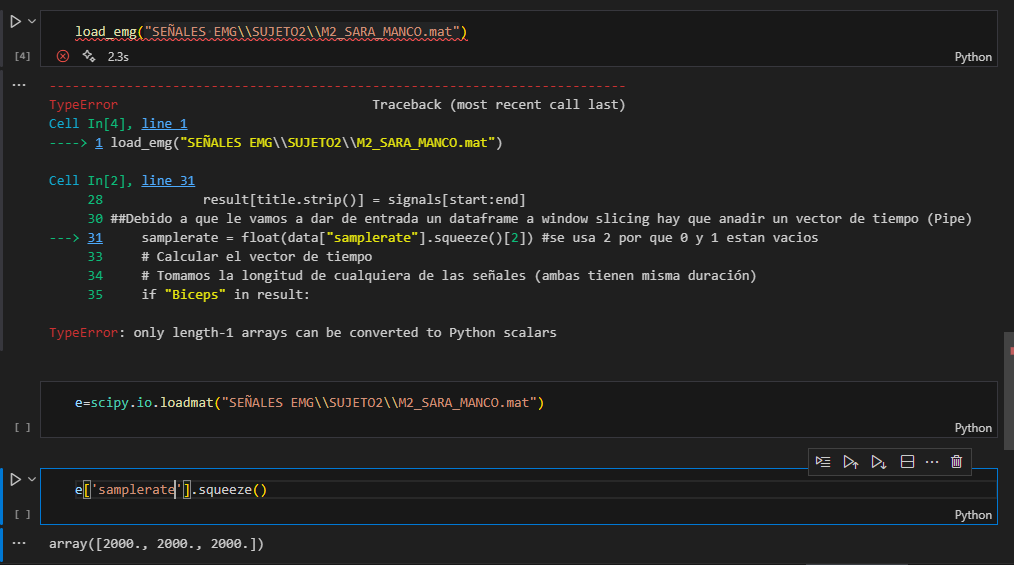

tuve que poner fijo el samplerate en la función load_emg debido a que en la muestra SEÑALES EMG\SUJETO2\M2_SARA_MANCO.mat hubo más de un stop al tomar la señal guardando en "samplerate" más valores osea que flatten, o squeese no solucionaban el problema, se debe modificar en caso de la frecuencia de muestreo no sea 2kHz

In [7]:
lista_de_Ventanas[20]

,Biceps_0,Biceps_1,Biceps_2,Biceps_3,Biceps_4,Biceps_5,Biceps_6,Biceps_7,Biceps_8,Biceps_9,...,Triceps_190,Triceps_191,Triceps_192,Triceps_193,Triceps_194,Triceps_195,Triceps_196,Triceps_197,Triceps_198,Triceps_199
0,-6.250000e-08,0.000000,-5.312500e-07,2.187500e-07,-0.000002,7.500000e-07,-0.000003,0.000002,-0.000005,0.000003,...,-0.000066,-0.000006,-8.656250e-05,-0.000006,-0.000102,-0.000005,-0.000112,-0.000005,-0.000117,-0.000005
1,2.593750e-06,0.000007,-7.812500e-07,7.093750e-06,-0.000005,7.593750e-06,-0.000007,0.000008,-0.000008,0.000009,...,0.000009,0.000012,8.250000e-06,0.000013,0.000008,0.000014,0.000008,0.000014,0.000009,0.000014
2,-1.181562e-04,-0.000005,-1.170313e-04,-4.593750e-06,-0.000114,-3.906250e-06,-0.000111,-0.000003,-0.000106,-0.000002,...,-0.000026,0.000010,-2.450000e-05,0.000010,-0.000023,0.000009,-0.000021,0.000009,-0.000019,0.000009
3,9.656250e-06,0.000014,1.096875e-05,1.331250e-05,0.000012,1.281250e-05,0.000013,0.000012,0.000013,0.000012,...,0.000008,0.000020,1.218750e-06,0.000020,-0.000005,0.000021,-0.000010,0.000021,-0.000015,0.000021
4,-1.681250e-05,0.000009,-1.450000e-05,9.437500e-06,-0.000012,9.875000e-06,-0.000011,0.000010,-0.000010,0.000011,...,-0.000005,0.000024,9.375000e-08,0.000023,0.000004,0.000023,0.000005,0.000022,0.000005,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,8.843750e-06,0.000126,2.165625e-05,9.468750e-05,0.000028,7.500000e-05,0.000028,0.000061,0.000022,0.000046,...,-0.000095,-0.000151,-7.912500e-05,-0.000163,-0.000060,-0.000165,-0.000038,-0.000158,-0.000010,-0.000141
609,-5.371875e-05,-0.000105,-5.203125e-05,-6.396875e-05,-0.000050,-1.787500e-05,-0.000050,0.000024,-0.000054,0.000047,...,-0.000017,0.000142,-2.362500e-05,0.000228,-0.000027,0.000277,-0.000030,0.000299,-0.000041,0.000308
610,2.434375e-05,-0.000112,6.015625e-05,-7.043750e-05,0.000090,-2.271875e-05,0.000112,0.000021,0.000126,0.000054,...,-0.000034,-0.000032,-5.681250e-05,-0.000052,-0.000082,-0.000070,-0.000106,-0.000081,-0.000125,-0.000084
611,-6.378125e-05,0.000309,-9.475000e-05,3.078750e-04,-0.000127,3.032500e-04,-0.000152,0.000291,-0.000166,0.000270,...,-0.000175,0.000167,-1.642813e-04,0.000157,-0.000151,0.000150,-0.000133,0.000142,-0.000109,0.000129


Faltaria automatizar la concatenación para obtener el dataframe, y talvez añadir un parametro de Samplerate o añadir excepciones a la función para solucionar el problema 